# Evaluación de modelos (ejercicio)

### **Importante: comentar adecuadamente cada paso realizado**, relacionándolo con lo visto en la teoría.

Para este ejercicio usaremos de nuevo los datos de cáncer de mama que están accesibles en scikit-learn.

In [82]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

## Parte 1: validación cruzada estratificada

Se pide implementar una funcion `mi_cross_val_f1` que aplique validación cruzada con $k$ particiones estratificadas, y que use **$F_1$ como métrica**. Similar a la función `cross_val_score`, pero específicamente con particiones estratificadas y métrica $F_1$, **y obviamente sin usar `cross_val_score`**.  

En concreto, la función debe tener los siguientes argumentos de entrada, `mi_cross_val_f1`*(modelo,X,y,n_splits=5,clase_positiva=1)*, donde:

- *modelo* es un un clasificador (en particular, un objeto de una clase que tenga métodos `fit` y `predict`).
- *X* es un array con los datos.
- *y* es un array con la clasificación (binaria) de los datos anteriores.
- *n_splits* es el número de particiones en la validación cruzada. Por defecto es 5.
- *clase_positiva* la clase que se ha considerar como positiva cuando se calcule la métrica $F_1$. Por defecto es 1. Nótese que al calcular la métrica $F_1$ debemos saber qué clase es la que se considera como positiva.  

Debe devolver una lista o array con *n_splits* números, los resultados de las *n_splits* evaluaciones de la métrica $F_1$ que se realizan al aplicar validación cruzada con *n_splits* particiones estratificadas. 

**Nota**: no se puede usar `cross_val_score`, pero se debe usar `f1_score`y la clase `StratifiedKFold` (consultar la documentación de ambas)

**Ejemplos**:

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver="liblinear")


# mi_cross_val_f1(logreg,X_train,y_train) devuelve:

#[0.9629629629629629,
# 0.9541284403669724,
# 0.9320388349514563,
# 0.9814814814814815,
# 0.9724770642201834]

# mi_cross_val_f1(logreg,X_train,y_train,n_splits=10) devuelve:

#[0.9818181818181818,
# 0.9433962264150944,
# 0.9433962264150944,
# 0.9642857142857143,
# 0.9433962264150944,
# 0.9629629629629629,
# 0.9818181818181818,
# 0.9811320754716981,
# 0.9811320754716981,
# 0.962962962962963]

# mi_cross_val_f1(logreg,X_train,y_train,n_splits=10,clase=0)

#[0.967741935483871,
# 0.9090909090909091,
# 0.9090909090909091,
# 0.9333333333333333,
# 0.9090909090909091,
# 0.9375,
# 0.967741935483871,
# 0.967741935483871,
# 0.967741935483871,
# 0.9285714285714286]

### Ejercicio
Definimos la función `mi_cross_val_f1`como se indica el enunciado. El funcionamiento es el siguiente: con el método `split` de la clase `StratifiedKFold`, obtenemos los conjuntos de entrenamiento y pruebas estratificados en el número de particiones que nos indique el parámetro *n_splits*. A continuación, para cada grupo de conjunto obtenemos los correspondientes a los datos, *X_train* para el conjunto de entrenamiento y *X_test* para el de pruebas; y los correspondientes a los de la clasificación, *y_train* para el conjunto de entrenamiento y *y_test* para el de pruebas. Entrenamos el modelo y obtenemos la predicción sobre el conjunto de pruebas. Por último aplicamos la métrica $F_1$ mediante la clase `f1_score`, a la cual le indicamos la clasificación real (*y_test*), la predicción obtenida anteriormente (*y_pred*), la clase que consideramos positiva (se indica como parámetro de la función) y *average*, que realmente no sería necesario al tratarse en este de caso de un problema binario porque este es su valor por defecto.

In [84]:
# Definr aquí mi_cross_val_f1
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
def mi_cross_val_f1(modelo,X,y,n_splits=5,clase_positiva=1):
    skf = StratifiedKFold(n_splits=n_splits)
    f1Score = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        f1Score.append(f1_score(y_test, y_pred, pos_label = clase_positiva, average='binary'))
    return f1Score

A continuación vamos a probar esta función con distintos valores y más adelante con `cross_val_score`, y veremos que los resultados coinciden.

In [85]:
mi_cross_val_f1(logreg,X_train,y_train)

[0.9629629629629629,
 0.9629629629629629,
 0.9142857142857143,
 0.9814814814814815,
 0.9724770642201834]

In [86]:
mi_cross_val_f1(logreg,X_train,y_train,n_splits=10)

[0.9818181818181818,
 0.9433962264150944,
 0.9433962264150944,
 0.9642857142857143,
 0.9433962264150944,
 0.9629629629629629,
 0.9818181818181818,
 0.9811320754716981,
 0.9811320754716981,
 0.962962962962963]

In [87]:
mi_cross_val_f1(logreg,X_train,y_train,n_splits=10,clase_positiva=0)

[0.967741935483871,
 0.9090909090909091,
 0.9090909090909091,
 0.9333333333333333,
 0.9090909090909091,
 0.9375,
 0.9655172413793104,
 0.967741935483871,
 0.967741935483871,
 0.9333333333333333]

Se puede comprobar que los tres ejemplos anteriores efectivamente coinciden con lo que devuelve `cross_val_score`:

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score

In [89]:
import numpy.testing as testing
result = mi_cross_val_f1(logreg,X_train,y_train)
origin = cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score),cv=5)
testing.assert_array_equal(result, origin)

In [90]:
cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score),cv=5)

array([0.96296296, 0.96296296, 0.91428571, 0.98148148, 0.97247706])

In [91]:
cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score),cv=10)

array([0.98181818, 0.94339623, 0.94339623, 0.96428571, 0.94339623,
       0.96296296, 0.98181818, 0.98113208, 0.98113208, 0.96296296])

In [92]:
cross_val_score(logreg,X_train,y_train,scoring=make_scorer(f1_score,pos_label=0),cv=10)

array([0.96774194, 0.90909091, 0.90909091, 0.93333333, 0.90909091,
       0.9375    , 0.96551724, 0.96774194, 0.96774194, 0.93333333])

## Parte 2: evaluación de modelos para datos del cáncer de mama

En esta parte supondremos que queremos encontrar un buen modelo para clasificación en el caso del cáncer de mama. Nos restingiremos a dos familias de clasificadores:

1. **SGDClassifier** con *loss="log"*. Es decir, regresión logística mediante descenso por el gradiente. 
2. **SVC**, máquina de vectores soporte con kernels.

En los datos del cáncer de mama, la clase 0 se corresponde con *maligno* y la clase 1 se corresponde con *benigno*. Supondremos también en esta sección que estamos interesado principalmente en el rendimiento sobre la detección del cáncer. Es decir, consideremos *maligno* como la clase positiva.

**Nota importante**: la clase positiva por defecto en scikit-learn es 1, y en este caso queremos considerar la clase 0 como la positiva. Para ello tenemos dos opciones:

- Usar el parámetro `pos_label` en las distintas funciones que usemos.
- Hacer una transformación inicial de las clases, para poner el 1 como 0 y el 0 como 1. Eso se consigue fácilmente haciendo `1-cancer.target`

### 2.1 *Grid Search* con validación cruzada



Aplicar `GridSearchCV` para ajustar hiperparámetros de los modelos `SGDClassifier`y `SVC`, aplicados al conjunto de datos del cáncer de mama.  En lugar de tratar de optimizar la tasa de aciertos, tratar de optimizar la métrica $F_1$ calculada considerando que los ejemplos de tumor "maligno" son los positivos. 

Tratar de encontrar valores optimos solo para aquellos hiperparámetos del modelo que te sean familiares y para valores de los que conozcas el significado. Probar con distintas rejillas. 

Una vez ajustados los dos modelos, dar para ambos:

- La tasa de aciertos, tanto en el conjunto de entrenamiento como en el de prueba.
- Matriz de confusión, tanto en entrenamiento como en prueba.
- *Classification report*, tanto para entrenamiento como para prueba. 

Interpretar los resultados. 


### Ejercicio
En primer lugar vamos a dividir los datos en un conjunto de entrenamiento y otro de pruebas. Aunque este paso se ha realizado para el ejercicio anterior, esta vez le vamos a aplicar la transformación para poner la clasificación 1 como 0 y 0 como 1.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 1-cancer.target, random_state=0)
target_names_rev = cancer.target_names[::-1]

Empecemos por el clasificador `SGDClassifier`. Vamos a aplicar `GridSearchCV` con la siguiente configuración:
- El clasificador `SGDClassifier`
- Posibles valores del parámetro de suavizado *alpha*
- Posibles valores de regularización *penalty*
- Como función de pérdida (*loss*) la indicada en el enunciado: regresión logística mediante descenso por el gradiente (*log*)
- Número máximo de iteraciones para intentar evitar el warning de la convergencia
- *scoring* f1 para optimizar esta métrica, en lugar de la tasa de aciertos que es la de por defecto

Vamos a mostrar qué resultados obtenemos y con qué hiperparámetros se consigue.

In [94]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
param_grid_sgd = {
    'loss' : ['log'],
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty' : ['l1', 'l2'],
    'max_iter': [5000]
}
grid_search_sgd = GridSearchCV(SGDClassifier(), param_grid_sgd, cv=5, return_train_score=True, scoring='f1') 
grid_search_sgd.fit(X_train, y_train)
print("Mejor clasificador encontrado: {}".format(grid_search_sgd.best_estimator_))
print("Evaluación sobre el conjunto de test: {:.3f}".format(grid_search_sgd.score(X_test, y_test)))

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mejor clasificador encontrado: SGDClassifier(alpha=0.1, loss='log', max_iter=5000, penalty='l1')
Evaluación sobre el conjunto de test: 0.830


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Ahora que tenemos ajustado el modelo, veamos la matriz de confusión, que como hemos visto en las clases y anteriormente, nos proporciona una predicción hecha por un clasificador respecto de los valores de clasificación reales.

In [95]:
from sklearn.metrics import confusion_matrix
y_pred_sgd = grid_search_sgd.predict(X_test)
confusion_sgd = confusion_matrix(y_test, y_pred_sgd)
print("Confusion matrix:\n{}\n".format(confusion_sgd))
print("Obtenemos:\n{} verdaderos negativos (TN)\n{} falsos positivos (FP)".format(confusion_sgd[0][0], confusion_sgd[0][1]))
print("{} falsos negativos (FN)\n{} verdaderos positivos".format(confusion_sgd[1][0], confusion_sgd[1][1]))


Confusion matrix:
[[81  9]
 [ 9 44]]

Obtenemos:
81 verdaderos negativos (TN)
9 falsos positivos (FP)
9 falsos negativos (FN)
44 verdaderos positivos


No está nada mal la tasa de aciertos<br><br>
Por últimos vamos a utilizar `classification_report`, que calcula la precision, recall y F1 para cada posible clasificación

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sgd, target_names = target_names_rev))

              precision    recall  f1-score   support

      benign       0.90      0.90      0.90        90
   malignant       0.83      0.83      0.83        53

    accuracy                           0.87       143
   macro avg       0.87      0.87      0.87       143
weighted avg       0.87      0.87      0.87       143



A continuación vamos a repetir los mismos pasos pero utilizando máquina de vectores soporte con kernels `SVC`. Similar al caso anterior, la configuración de `GridSearchCV` es la siguiente:

Empecemos por el clasificador `SGDClassifier`. Vamos a aplicar `GridSearchCV` con la siguiente configuración:
- El clasificador `SVC`
- Posibles valores del parámetro del coeficiente del kernel *gamma*
- Posibles valores del coeficiente de regularización *C*
- *scoring* f1 para optimizar esta métrica, en lugar de la tasa de aciertos que es la de por defecto

Vamos a mostrar qué resultados obtenemos y con qué hiperparámetros se consigue.

In [97]:
from sklearn.svm import SVC
param_grid_svc = {
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, return_train_score=True, scoring='f1') 
grid_search_svc.fit(X_train, y_train)
print("Mejor clasificador encontrado: {}", grid_search_svc.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search_svc.score(X_test, y_test)))


Mejor clasificador encontrado: {} SVC(C=1, gamma=0.001)
Evaluación sobre el conjunto de test: 0.91


A continuación se muestra los resultados de la matriz de confusión.

In [98]:
y_pred_svc = grid_search_svc.predict(X_test)
confusion_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion matrix:\n{}\n".format(confusion_svc))
print("Obtenemos:\n{} verdaderos negativos (TN)\n{} falsos positivos (FP)".format(confusion_svc[0][0], confusion_svc[0][1]))
print("{} falsos negativos (FN)\n{} verdaderos positivos".format(confusion_svc[1][0], confusion_svc[1][1]))

Confusion matrix:
[[84  6]
 [ 4 49]]

Obtenemos:
84 verdaderos negativos (TN)
6 falsos positivos (FP)
4 falsos negativos (FN)
49 verdaderos positivos


Y por último *classification report*

In [99]:
print(classification_report(y_test, y_pred_svc, target_names = target_names_rev))

              precision    recall  f1-score   support

      benign       0.95      0.93      0.94        90
   malignant       0.89      0.92      0.91        53

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



Comparado con el clasificador anterior, obtenemos mejores resultados con SVC.

### 2.2 Curvas *ROC* y *PR*

Comparar ambos modelos construidos en el apartado anterior, dibujando sendas gráficas con las curvas ROC de ambos y con las curvas PR de ambos. Interretar las gráficas y calcular para ambos modelos la precisión media (*average precision*) y el área bajo la curva (*AUC*).

Interpretar los resultados.

### Ejercicio
Vamos a empezar dibujando las curvas **ROC** de los 2 modelos que hemos construido anteriormente.

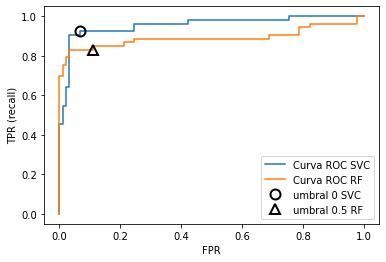

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, grid_search_svc.decision_function(X_test))
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, grid_search_sgd.decision_function(X_test))

plt.plot(fpr_svc, tpr_svc, label="Curva ROC SVC")
plt.plot(fpr_sgd, tpr_sgd, label="Curva ROC RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds_svc))
plt.plot(fpr_svc[close_zero], tpr_svc[close_zero], 'o', markersize=10, label="umbral 0 SVC", fillstyle="none", c='k', mew=2)
close_default_sgd = np.argmin(np.abs(thresholds_sgd - 0.5))
plt.plot(fpr_sgd[close_default_sgd], tpr_sgd[close_default_sgd], '^', markersize=10, label="umbral 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

En curvas ROC el clasificador es mejor cuanto mas cerca esté de la esquina superior izquierda, pues tendríamos un recall alto y una tasa de error (FPR) baja. Observando la gráfica, podemos decir que ambos son muy parecidos, así que vamos a calcular el área bajo la curva (AUC) para ver de forma númerica cuál tiene mejor rendimiento.

In [101]:
from sklearn.metrics import roc_auc_score
svc_auc = roc_auc_score(y_test, grid_search_svc.decision_function(X_test))
sgd_auc = roc_auc_score(y_test, grid_search_sgd.decision_function(X_test))
print("AUC de SGD: {:.3f}".format(sgd_auc))
print("AUC de SVC: {:.3f}".format(svc_auc))

AUC de SGD: 0.891
AUC de SVC: 0.955


En los resultados obtenidos, confirmamos lo que preveíamos viendo la gráfica: el comportamiento de ambos clasificadores es bastante similar, aunque SVC es un poco mejor que SGD.<br><br>
Ahora vamos a dibujar las curvas **PR**.

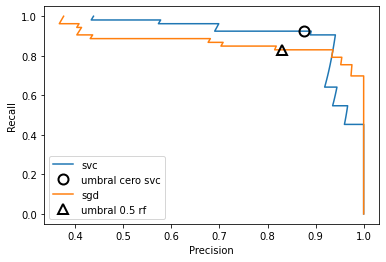

In [102]:
from sklearn.metrics import precision_recall_curve 
precision_svc, recall_svc, pr_thresholds_svc = precision_recall_curve(y_test, grid_search_svc.decision_function(X_test))
precision_sgd, recall_sgs, pr_thresholds_sgd = precision_recall_curve(y_test, grid_search_sgd.decision_function(X_test))

close_zero_pr = np.argmin(np.abs(pr_thresholds_svc))
plt.plot(precision_svc, recall_svc, label="svc")
plt.plot(precision_svc[close_zero_pr], recall_svc[close_zero_pr], 'o', markersize=10, label="umbral cero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_sgd, recall_sgs, label="sgd")

close_default_sgd = np.argmin(np.abs(pr_thresholds_sgd - 0.5))
plt.plot(precision_sgd[close_default_sgd], recall_sgs[close_default_sgd], '^', c='k', markersize=10, label="umbral 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

En curvas PR, cuanto mas cerca esté de la esquina superior derecha, mejor es el clasificador. Podemos decir de lo que vemos en el gráfico, que hasta cierto valor de preción, un poco más de 0,9, SVC sería mejor, pero a partir de ahí sería mejor el clasificador SGD.<br>
Vamos a calcular el área bajo la curva, que en curvas PR se le suele llamar precisión media.

In [103]:
from sklearn.metrics import average_precision_score
ap_svc = average_precision_score(y_test, grid_search_svc.decision_function(X_test))
ap_sgd = average_precision_score(y_test, grid_search_sgd.decision_function(X_test))
print("Precisión media de SGD: {:.3f}".format(ap_sgd))
print("Precisión media de SVC: {:.3f}".format(ap_svc))

Precisión media de SGD: 0.912
Precisión media de SVC: 0.941


Viendo los resultados, comprobamos de nuevo que el comportamiento de ambos clasificadores es bastante similar, siendo ligeramente mejor SGD en esta ocasión